#### Discrete Simulation HW3
#### Problem 1
Authored: Austin Jetrin Maddison 6481268

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from my_settings import *

In [4]:
def chain_dist(chains=4, L=0, U=371):
    if chains == 0:
        return np.random.randint(L, U) 
    
    U_new = chain_dist(chains-1, L, U)
    if U_new == L : return U_new
    
    return np.random.randint(L, U_new)

In [5]:
f = np.vectorize(lambda x : chain_dist())
leading_digit =  np.vectorize(lambda _: int(str(np.abs(_))[0]))

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('../data/stars.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [8]:
df = df.drop(['Star color', 'Star color', 'Spectral Class', 'Star type'], axis=1)

In [9]:
cols = df.columns
cols

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)'],
      dtype='object')

In [10]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


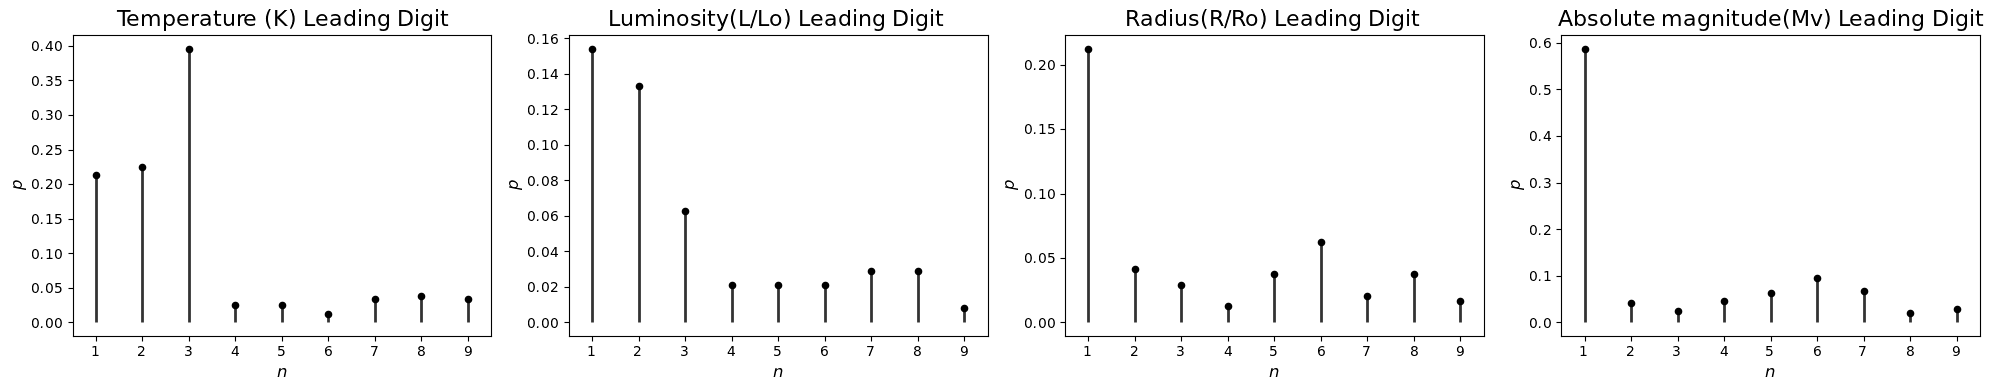

In [19]:
n_cols = len(cols)
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
axs = axs.flatten()

for i, col in enumerate(cols):
    
    res = leading_digit(df[col].values)
    hist, edge = np.histogram(res, density=True, bins=np.arange(0, 11, 1))

    ax = axs[i]
    ax.scatter(edge[1:-1], hist[1:], s=20, color="k", marker='o', zorder=4)
    ax.vlines(edge[1:-1], ymax=hist[1:], ymin=np.zeros(hist.size-1), color='k', alpha=0.8, linewidth=2)
    
    ax.set_xlim(0.5, 9.5)
    ax.set_title(f"{col} Leading Digit", fontsize=16)
    ax.set_xlabel("$n$", fontsize=12)
    ax.set_ylabel("$p$", fontsize=12)

plt.tight_layout()

plt.savefig("../drawings/p2_subplots.pdf")
plt.show()